In [1]:
# Install libraries 
!pip install ndlib
!pip install networkx

In [2]:
from platform import python_version

print(python_version())

3.7.7


In [4]:
# Import modules
from ndlib.models.CompositeModel import CompositeModel
import ndlib.viz.mpl.DiffusionTrend
import ndlib.models.ModelConfig as mc
from ndlib.models.compartments.NodeStochastic import NodeStochastic as ns
import collections
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


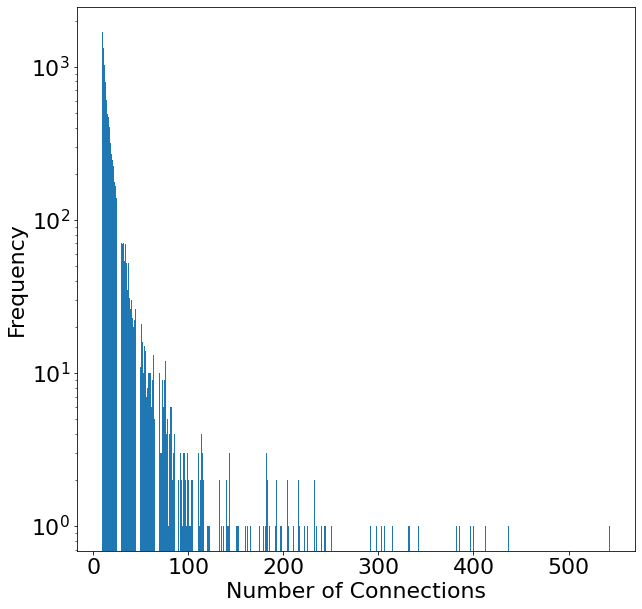

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.22it/s]


NameError: name 'DiffusionTrend' is not defined

In [5]:
# COVID19 model parameters - Change to expore different scnerios 

initial_infected =  0.05   # initial infection rate 
Transmission_rate = 0.064 # Transmission rate
P_death = 0.0286  # Mortality rate
P_recover = 1 - P_death  # Assume all that don't die recover
minconnections = 10  # Minimum number of connections per Node

# Generate a graph reprsenting a network of 1,000 people
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size': 22})
g = nx.barabasi_albert_graph(n=10000, m = minconnections)

# Use the below to plot your network if desired!
#pos = nx.spring_layout(g)
#nx.draw_networkx(g, pos)
#plt.show()

# Plot distribution of node connections
def plot_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    f = plt.bar(deg, cnt)
    ax.set_xlabel('Number of Connections')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')
    plt.show()

plot_degree_distribution(g)


# Composite model instantiation: Initialise possible status of graph nodes
model = CompositeModel(g)
model.add_status('Susceptible')
model.add_status('Infected')
model.add_status('Deceased')


# Define compartments for model rules
c1 = ns(Transmission_rate, triggering_status="Infected")  # Note: Only infected nieghbours can trigger an infection 
c2 = ns(P_death)
c3 = ns(P_recover)
c4 = ns(0)


# Rule definitions for COVID-19 transmission 
model.add_rule('Susceptible', 'Infected', c1)
model.add_rule('Infected', 'Deceased', c2)
model.add_rule('Infected', 'Susceptible', c3)
model.add_rule('Susceptible', 'Deceased', c4)


# Configuration 
config = mc.Configuration()
config.add_model_parameter('percentage_infected', initial_infected)
model.set_initial_status(config)


# Simulation 
iterations = model.iteration_bunch(1000, node_status=False)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()




